In [77]:
import numpy as np
import pandas as pd

In [184]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [14]:
sample_size, nr_sample = 100, 10
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [194]:
nr_moments = 10
moments_df = dem.get_moments(bounded_samples, nr_moments)

num_steps = 100
x_b = np.linspace(0,1,num_steps)
kde_df = dem.get_kde(bounded_samples, x_b)
edf_df = dem.get_edf(bounded_samples, x_b)

max_t = 20
t = np.linspace(max_t/num_steps, max_t, num_steps)
ecf_df = dem.get_ecf(bounded_samples, t)

In [187]:
original_d = d.w_distance(bounded_samples)
moments_d = d.w_distance(moments_df)
kde_d = d.w_distance(kde_df)

In [191]:
edf_d = d.w_distance(edf_df)

In [195]:
ecf_d = d.w_distance(ecf_df)

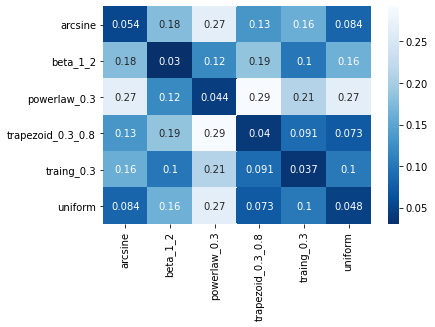

In [183]:
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

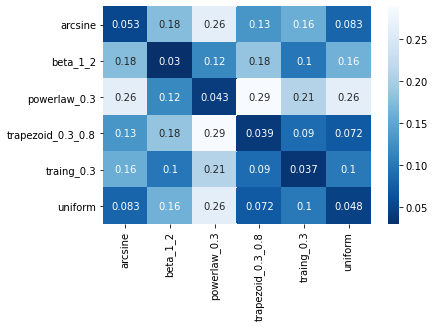

In [193]:
d.plot_matrix(edf_d, bounded_samples.iloc[:,-1].unique())

In [185]:
d.corr_coef(original_d,moments_d)

(0.9876127663617322, 6.170506532628963e-29)

In [189]:
d.corr_coef(original_d,kde_d)

(0.8003948506194818, 4.6487826740745245e-09)

In [192]:
d.corr_coef(original_d,edf_d)

(0.9999926976144188, 8.499524315421426e-84)

In [196]:
d.corr_coef(original_d,ecf_d)

(0.8355790513823939, 2.2980472074345945e-10)

In [199]:
for i in range(2,11):
    moments_df = dem.get_moments(bounded_samples, i)
    moments_d = d.w_distance(moments_df)
    print(d.corr_coef(original_d,moments_d))

(0.9848153360892653, 1.9249024853683623e-27)
(0.986102387284565, 4.312758688729029e-28)
(0.9881232195226441, 3.029143074118292e-29)
(0.9880658756052185, 3.2861829355417646e-29)
(0.9885843408590064, 1.5505269953392576e-29)
(0.988218077512156, 2.645020582577859e-29)
(0.9880538549895802, 3.3426033980517137e-29)
(0.9877891946799686, 4.8416410607244554e-29)
(0.9876127663617322, 6.170506532628963e-29)
